In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
holidays = pd.read_csv("/kaggle/input/gdz-elektrik-datathon-2024/holidays.csv")
sub = pd.read_csv("/kaggle/input/gdz-elektrik-datathon-2024/sample_submission.csv")
test = pd.read_csv("/kaggle/input/gdz-elektrik-datathon-2024/test.csv")
train = pd.read_csv("/kaggle/input/gdz-elektrik-datathon-2024/train.csv")
weather = pd.read_csv("/kaggle/input/gdz-elektrik-datathon-2024/weather.csv")

In [3]:
weather['name'] = weather['name'].str.lower()

In [4]:
weather

,date,lat,lon,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,name
0,2021-01-01 00:00:00,38.6184,28.6712,7.6,10.5,0.0,86.1,173.3,2.6,1.0,5.9,manisa-ahmetli
1,2021-01-01 01:00:00,38.6184,28.6712,7.4,6.8,0.0,88.0,174.5,2.7,1.0,5.7,manisa-ahmetli
2,2021-01-01 02:00:00,38.6184,28.6712,7.3,4.3,0.0,90.0,177.5,2.8,1.0,5.4,manisa-ahmetli
3,2021-01-01 03:00:00,38.6184,28.6712,7.2,8.9,0.0,90.8,175.3,2.7,1.0,5.3,manisa-ahmetli
4,2021-01-01 04:00:00,38.6184,28.6712,8.0,22.1,0.0,89.7,172.1,2.5,1.0,6.5,manisa-ahmetli
...,...,...,...,...,...,...,...,...,...,...,...,...
1302835,2024-02-29 19:00:00,38.2283,27.9748,16.8,50.0,0.0,61.6,278.2,1.7,16.0,16.3,izmir-odemis
1302836,2024-02-29 20:00:00,38.2283,27.9748,15.4,52.4,0.0,69.4,264.7,1.4,9.2,15.4,izmir-odemis
1302837,2024-02-29 21:00:00,38.2283,27.9748,16.5,63.7,0.0,62.9,278.4,0.5,43.9,16.9,izmir-odemis
1302838,2024-02-29 22:00:00,38.2283,27.9748,15.9,61.7,0.0,64.3,242.1,0.7,58.5,16.1,izmir-odemis


### Yeni veri setinde mart ayındaki 10 günlük veri silinmiş.. Yani mart ayından bilgi yok. Farklı bir veri seti kullanacağız diyorlar ama bence öyle olmayacak

In [5]:
# Tarih sütununu datetime tipine dönüştürelim
weather['date'] = pd.to_datetime(weather['date'])

In [6]:
weather.rename(columns={'name': 'ilce'}, inplace=True)

# Weather'deki global_rad:W sütunu, bize gün ışığının olduğu saatleri verecek.

In [7]:
dogrulama = weather[weather['ilce'] == "manisa-akhisar"].sort_values(by='date').head(24)
dogrulama

,date,lat,lon,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,ilce
27720,2021-01-01 00:00:00,38.9177,27.8366,10.1,40.5,0.0,84.7,130.8,1.8,1.0,10.2,manisa-akhisar
27721,2021-01-01 01:00:00,38.9177,27.8366,10.1,30.5,0.0,83.2,132.0,1.8,1.0,10.1,manisa-akhisar
27722,2021-01-01 02:00:00,38.9177,27.8366,9.6,39.6,0.0,83.6,136.0,1.8,1.0,8.9,manisa-akhisar
27723,2021-01-01 03:00:00,38.9177,27.8366,9.2,54.2,0.0,84.5,125.7,1.9,1.0,8.4,manisa-akhisar
27724,2021-01-01 04:00:00,38.9177,27.8366,9.7,64.9,0.0,86.2,148.9,1.8,1.0,9.0,manisa-akhisar
27725,2021-01-01 05:00:00,38.9177,27.8366,9.7,74.6,0.0,86.2,164.8,1.6,1.0,9.2,manisa-akhisar
27726,2021-01-01 06:00:00,38.9177,27.8366,10.4,64.9,0.0,84.1,159.2,1.2,1.0,10.4,manisa-akhisar
27727,2021-01-01 07:00:00,38.9177,27.8366,9.5,66.8,0.0,90.0,135.8,1.5,1.0,9.0,manisa-akhisar
27728,2021-01-01 08:00:00,38.9177,27.8366,9.2,70.9,0.0,90.8,129.1,1.7,1.0,8.5,manisa-akhisar
27729,2021-01-01 09:00:00,38.9177,27.8366,10.3,75.0,25.9,85.9,141.2,1.0,1.0,10.6,manisa-akhisar


In [8]:
# 'global_rad:W' sütununa göre gündüz ve gece gruplamalarını yapalım
weather['gece'] = weather['global_rad:W'] == 0
weather['gündüz'] = weather['global_rad:W'] != 0

# Tarih ve ilçe sütunlarına göre gruplayıp, her bir grup için gündüz ve gece verilerinin ortalamasını alalım
grouped = weather.groupby(['date', 'ilce', 'gece', 'gündüz'])
gece_ortalama = grouped.mean().loc[(slice(None), slice(None), True, False), :].reset_index(level=[2, 3], drop=True).add_prefix('gece_')
gündüz_ortalama = grouped.mean().loc[(slice(None), slice(None), False, True), :].reset_index(level=[2, 3], drop=True).add_prefix('gündüz_')

# Her bir gün için sadeleştirilmiş veriyi elde edelim
sadelesmis_df = pd.concat([gece_ortalama, gündüz_ortalama], axis=1).reset_index()

In [9]:
sadelesmis_df = sadelesmis_df.groupby([pd.Grouper(key='date', freq='D'), 'ilce']).mean().reset_index()

In [10]:
len(sadelesmis_df)

54285

In [11]:
sadelesmis_df[sadelesmis_df['ilce'] == "manisa-akhisar"].sort_values(by='date').head(1)

,date,ilce,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,gece_wind_dir_10m:d,gece_wind_speed_10m:ms,...,gündüz_lat,gündüz_lon,gündüz_t_2m:C,gündüz_effective_cloud_cover:p,gündüz_global_rad:W,gündüz_relative_humidity_2m:p,gündüz_wind_dir_10m:d,gündüz_wind_speed_10m:ms,gündüz_prob_precip_1h:p,gündüz_t_apparent:C
31,2021-01-01,manisa-akhisar,38.9177,27.8366,9.886667,51.96,0.0,88.493333,104.1,1.413333,...,38.9177,27.8366,13.211111,55.377778,190.822222,82.866667,182.711111,1.2,1.0,15.5


In [12]:
print(dogrulama["t_2m:C"].sum())
print("gündüz'ün t_2m:C değerleri:", 12.0 + 12.7 + 13.3 + 14 + 14.2 + 14.7 + 15 + 15 + 14.6)
print("gece'nin t_2m:C değer ortalaması: ",(314.1 - 125.5) / 15)
print("gündüzün t_2m:C değer ortalaması: ",125.5 / 9)

267.2
gündüz'ün t_2m:C değerleri: 125.5
gece'nin t_2m:C değer ortalaması:  12.573333333333334
gündüzün t_2m:C değer ortalaması:  13.944444444444445


> #### global_rad:W değeri doğru. gündüz değeri, 9 satıra bölünmüş hali, yani doğru. gece zaten 0 olacak, o da doğru.
> #### t_2m:C değerini de kontrol ettim, o da doğru her ikisi için de
#### yani kod sorunsuz çalışıyor

In [13]:
sadelesmis_df.isna().sum()

date                              0
ilce                              0
gece_lat                          0
gece_lon                          0
gece_t_2m:C                       0
gece_effective_cloud_cover:p      0
gece_global_rad:W                 0
gece_relative_humidity_2m:p       0
gece_wind_dir_10m:d               0
gece_wind_speed_10m:ms            0
gece_prob_precip_1h:p             0
gece_t_apparent:C                 0
gündüz_lat                        0
gündüz_lon                        0
gündüz_t_2m:C                     0
gündüz_effective_cloud_cover:p    0
gündüz_global_rad:W               0
gündüz_relative_humidity_2m:p     0
gündüz_wind_dir_10m:d             0
gündüz_wind_speed_10m:ms          0
gündüz_prob_precip_1h:p           0
gündüz_t_apparent:C               0
dtype: int64

# Tüm günleri ekleyelim. haftaiçi veya sonu olarak da ekleyelim.

In [14]:
# Hafta içi ve hafta sonu sütunlarını ekleyelim
sadelesmis_df['hafta_ici'] = (sadelesmis_df['date'].dt.dayofweek < 5).astype(int)
sadelesmis_df['hafta_sonu'] = (sadelesmis_df['date'].dt.dayofweek >= 5).astype(int)

In [15]:
günler = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for gün in günler:
    sadelesmis_df[gün] = (sadelesmis_df['date'].dt.strftime('%A') == gün).astype(int)

In [16]:
print(sadelesmis_df["Monday"].sum())
print(sadelesmis_df["Tuesday"].sum())
print(sadelesmis_df["Wednesday"].sum())
print(sadelesmis_df["Thursday"].sum())
print(sadelesmis_df["Friday"].sum())
print(sadelesmis_df["Saturday"].sum())
print(sadelesmis_df["Sunday"].sum())

7755
7755
7755
7755
7755
7755
7755


##### cuma-cumartesi-pazar günleri 1 tane fazlaydı diğer günlerden. Değiştirmişler. Ek bilgi. Bir işe yarar mı bilmem

In [17]:
# 'ilce' ve 'tarih' sütunlarını oluşturarak eksik satırları doldurmak için kullanacağımız bir DataFrame oluşturalım
ilceler = train['ilce'].unique()
tarihler = pd.date_range(start='2021-01-01', end='2024-02-29', freq='D')
takvim = pd.DataFrame([(ilce, tarih) for ilce in ilceler for tarih in tarihler], columns=['ilce', 'tarih'])

# 'takvim' DataFrame'ini 'train' DataFrame'ine ekleyelim ve eksik olan satırları dolduralım
train['tarih'] = pd.to_datetime(train['tarih'])  # 'train' DataFrame'indeki 'tarih' sütununu datetime64[ns] veri türüne dönüştürme
takvim['tarih'] = pd.to_datetime(takvim['tarih'])  # 'takvim' DataFrame'indeki 'tarih' sütununu datetime64[ns] veri türüne dönüştürme
train = pd.merge(takvim, train, on=['ilce', 'tarih'], how='left')

# Eksik olan satırları dolduralım
train['bildirimsiz_sum'].fillna(0, inplace=True)
train['bildirimli_sum'].fillna(0, inplace=True)

/tmp/ipykernel_18/947199136.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['bildirimsiz_sum'].fillna(0, inplace=True)
/tmp/ipykernel_18/947199136.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [18]:
sadelesmis_df = sadelesmis_df.rename(columns={'date': 'tarih'})

In [19]:
sadelesmis_df

,tarih,ilce,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,gece_wind_dir_10m:d,gece_wind_speed_10m:ms,...,gündüz_t_apparent:C,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2021-01-01,izmir-aliaga,38.7996,26.9707,12.620000,55.073333,0.0,88.206667,160.320000,4.273333,...,16.155556,1,0,0,0,0,0,1,0,0
1,2021-01-01,izmir-balcova,38.3891,27.0500,12.573333,55.540000,0.0,89.813333,144.426667,3.446667,...,15.822222,1,0,0,0,0,0,1,0,0
2,2021-01-01,izmir-bayindir,38.2178,27.6478,10.346667,56.373333,0.0,90.093333,47.026667,1.886667,...,15.177778,1,0,0,0,0,0,1,0,0
3,2021-01-01,izmir-bayrakli,38.4612,27.1881,12.153333,53.340000,0.0,90.553333,136.460000,2.473333,...,15.700000,1,0,0,0,0,0,1,0,0
4,2021-01-01,izmir-bergama,39.1214,27.1799,10.846667,61.113333,0.0,89.700000,164.506667,1.393333,...,15.355556,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54280,2024-02-29,manisa-sehzadeler,38.6140,27.4296,13.015385,25.161538,0.0,77.292308,227.369231,0.861538,...,21.281818,1,0,0,0,0,1,0,0,0
54281,2024-02-29,manisa-selendi,38.7450,28.8693,9.900000,15.838462,0.0,76.346154,75.607692,1.415385,...,18.790909,1,0,0,0,0,1,0,0,0
54282,2024-02-29,manisa-soma,39.1881,27.6100,12.153846,19.823077,0.0,80.384615,121.753846,0.946154,...,20.690909,1,0,0,0,0,1,0,0,0
54283,2024-02-29,manisa-turgutlu,38.5002,27.7084,12.569231,23.300000,0.0,75.138462,197.915385,0.961538,...,20.945455,1,0,0,0,0,1,0,0,0


In [20]:
(54755 - 54285) / 47, "günlük veri silinmiş"

(10.0, 'günlük veri silinmiş')

In [21]:
train['tarih'] = pd.to_datetime(train['tarih'])
sadelesmis_df['tarih'] = pd.to_datetime(sadelesmis_df['tarih'])

In [22]:
# 'city' sütunu üzerinden birleştirme yapalım
merged_df = pd.merge(train, sadelesmis_df, on=['tarih','ilce'], how='left')

In [23]:
train

,ilce,tarih,bildirimsiz_sum,bildirimli_sum
0,izmir-aliaga,2021-01-01,5.0,0.0
1,izmir-aliaga,2021-01-02,13.0,0.0
2,izmir-aliaga,2021-01-03,4.0,0.0
3,izmir-aliaga,2021-01-04,9.0,0.0
4,izmir-aliaga,2021-01-05,2.0,0.0
...,...,...,...,...
54280,manisa-ahmetli,2024-02-25,0.0,0.0
54281,manisa-ahmetli,2024-02-26,0.0,0.0
54282,manisa-ahmetli,2024-02-27,0.0,0.0
54283,manisa-ahmetli,2024-02-28,0.0,0.0


In [24]:
merged_df.head(14)

,ilce,tarih,bildirimsiz_sum,bildirimli_sum,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,...,gündüz_t_apparent:C,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,izmir-aliaga,2021-01-01,5.0,0.0,38.7996,26.9707,12.620000,55.073333,0.0,88.206667,...,16.155556,1,0,0,0,0,0,1,0,0
1,izmir-aliaga,2021-01-02,13.0,0.0,38.7996,26.9707,11.686667,35.166667,0.0,87.766667,...,16.900000,0,1,0,0,0,0,0,1,0
2,izmir-aliaga,2021-01-03,4.0,0.0,38.7996,26.9707,11.946667,50.686667,0.0,80.540000,...,14.544444,0,1,0,0,0,0,0,0,1
3,izmir-aliaga,2021-01-04,9.0,0.0,38.7996,26.9707,13.033333,48.693333,0.0,73.693333,...,15.988889,1,0,1,0,0,0,0,0,0
4,izmir-aliaga,2021-01-05,2.0,0.0,38.7996,26.9707,13.514286,34.107143,0.0,81.342857,...,17.110000,1,0,0,1,0,0,0,0,0
5,izmir-aliaga,2021-01-06,2.0,0.0,38.7996,26.9707,11.807143,35.864286,0.0,79.214286,...,16.350000,1,0,0,0,1,0,0,0,0
6,izmir-aliaga,2021-01-07,3.0,2.0,38.7996,26.9707,12.428571,34.435714,0.0,79.571429,...,17.150000,1,0,0,0,0,1,0,0,0
7,izmir-aliaga,2021-01-08,5.0,1.0,38.7996,26.9707,14.264286,54.435714,0.0,82.921429,...,18.790000,1,0,0,0,0,0,1,0,0
8,izmir-aliaga,2021-01-09,8.0,0.0,38.7996,26.9707,15.542857,56.721429,0.0,82.300000,...,17.920000,0,1,0,0,0,0,0,1,0
9,izmir-aliaga,2021-01-10,8.0,0.0,38.7996,26.9707,16.407143,66.857143,0.0,78.371429,...,19.910000,0,1,0,0,0,0,0,0,1


# Verileri inceleyek

In [25]:
import pandas as pd

# Veri setindeki her bir ilçe için 7 günlük otokorelasyon hesaplayarak yeni bir sütuna ekleme
for ilce in merged_df['ilce'].unique():
    ilce_data = merged_df[merged_df['ilce'] == ilce]
    
    # Tarihin 7 gün önceki değerini alarak yeni bir sütuna ekleme
    merged_df.loc[merged_df['ilce'] == ilce, 'lagged_bildirimsiz_sum'] = ilce_data['bildirimsiz_sum'].shift(7)
    
    # İlk 6 günde NaN değerleri 0 ile doldurma
    merged_df['lagged_bildirimsiz_sum'].fillna(0, inplace=True)

/tmp/ipykernel_18/95440100.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['lagged_bildirimsiz_sum'].fillna(0, inplace=True)
/tmp/ipykernel_18/95440100.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

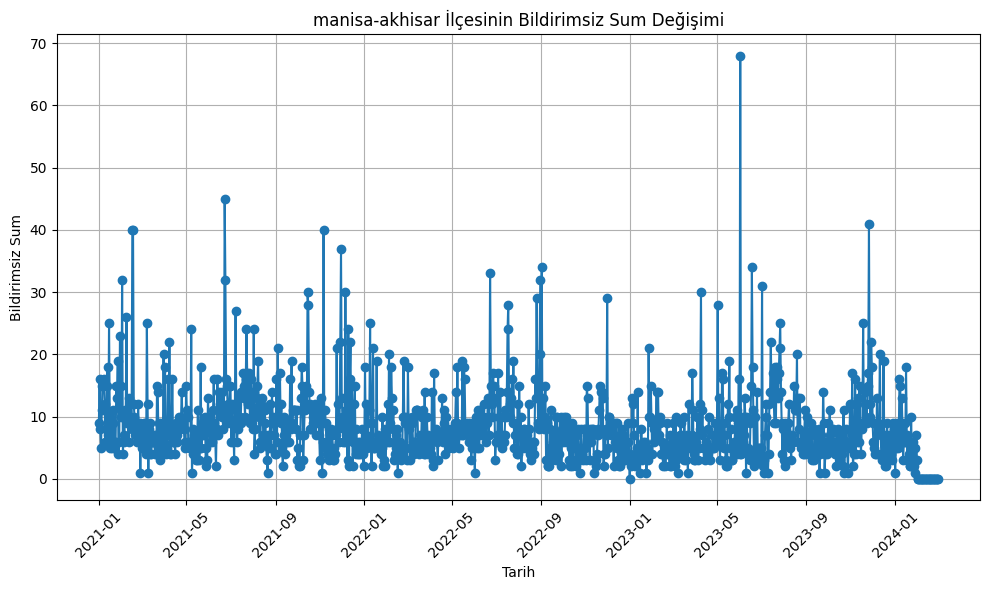

In [26]:
# Tarih sütununu datetime nesnesine dönüştürelim
merged_df['tarih'] = pd.to_datetime(merged_df['tarih'])

# 'manisa-akhisar' ilçesinin verilerini filtreleyelim
akhisar_data = merged_df[merged_df['ilce'] == 'manisa-akhisar']

# Grafik çizelim
plt.figure(figsize=(10, 6))
plt.plot(akhisar_data['tarih'], akhisar_data['bildirimsiz_sum'], marker='o', linestyle='-')
plt.title('manisa-akhisar İlçesinin Bildirimsiz Sum Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Bildirimsiz Sum')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

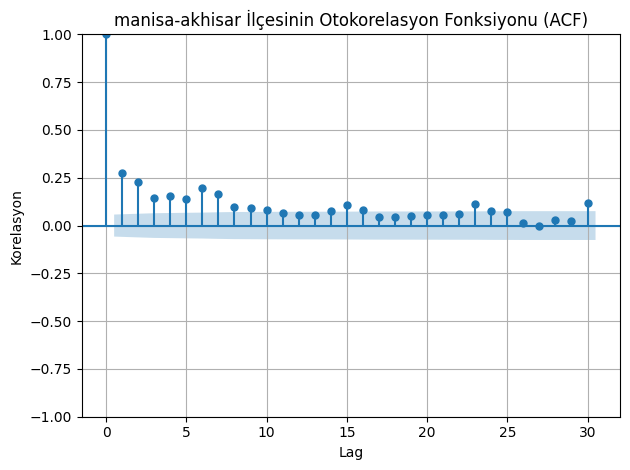

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

# Otokorelasyon fonksiyonunu çizelim
plt.figure(figsize=(10, 6))
plot_acf(akhisar_data['bildirimsiz_sum'], lags=30)  # İstenilen lag değerini ayarlayabilirsiniz
plt.title('manisa-akhisar İlçesinin Otokorelasyon Fonksiyonu (ACF)')
plt.xlabel('Lag')
plt.ylabel('Korelasyon')
plt.grid(True)
plt.tight_layout()
plt.show()

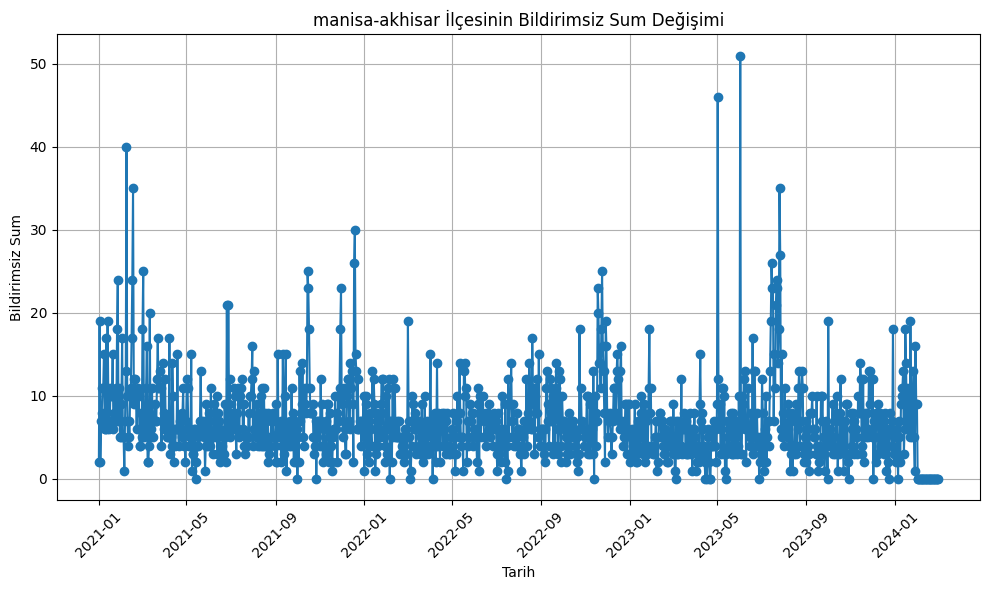

In [28]:
# Tarih sütununu datetime nesnesine dönüştürelim
merged_df['tarih'] = pd.to_datetime(merged_df['tarih'])

# 'manisa-akhisar' ilçesinin verilerini filtreleyelim
izmir_buca = merged_df[merged_df['ilce'] == 'izmir-buca']

# Grafik çizelim
plt.figure(figsize=(10, 6))
plt.plot(izmir_buca['tarih'], izmir_buca['bildirimsiz_sum'], marker='o', linestyle='-')
plt.title('manisa-akhisar İlçesinin Bildirimsiz Sum Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Bildirimsiz Sum')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

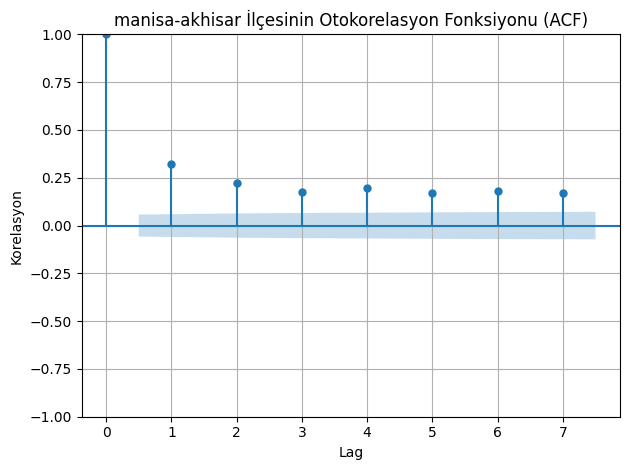

In [29]:
# Otokorelasyon fonksiyonunu çizelim
plt.figure(figsize=(10, 6))
plot_acf(izmir_buca['bildirimsiz_sum'], lags=7)  # İstenilen lag değerini ayarlayabilirsiniz
plt.title('manisa-akhisar İlçesinin Otokorelasyon Fonksiyonu (ACF)')
plt.xlabel('Lag')
plt.ylabel('Korelasyon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
merged_df

,ilce,tarih,bildirimsiz_sum,bildirimli_sum,gece_lat,gece_lon,gece_t_2m:C,gece_effective_cloud_cover:p,gece_global_rad:W,gece_relative_humidity_2m:p,...,hafta_ici,hafta_sonu,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,lagged_bildirimsiz_sum
0,izmir-aliaga,2021-01-01,5.0,0.0,38.7996,26.9707,12.620000,55.073333,0.0,88.206667,...,1,0,0,0,0,0,1,0,0,0.0
1,izmir-aliaga,2021-01-02,13.0,0.0,38.7996,26.9707,11.686667,35.166667,0.0,87.766667,...,0,1,0,0,0,0,0,1,0,0.0
2,izmir-aliaga,2021-01-03,4.0,0.0,38.7996,26.9707,11.946667,50.686667,0.0,80.540000,...,0,1,0,0,0,0,0,0,1,0.0
3,izmir-aliaga,2021-01-04,9.0,0.0,38.7996,26.9707,13.033333,48.693333,0.0,73.693333,...,1,0,1,0,0,0,0,0,0,0.0
4,izmir-aliaga,2021-01-05,2.0,0.0,38.7996,26.9707,13.514286,34.107143,0.0,81.342857,...,1,0,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54280,manisa-ahmetli,2024-02-25,0.0,0.0,38.6184,28.6712,9.015385,22.723077,0.0,67.176923,...,0,1,0,0,0,0,0,0,1,0.0
54281,manisa-ahmetli,2024-02-26,0.0,0.0,38.6184,28.6712,8.361538,59.738462,0.0,71.600000,...,1,0,1,0,0,0,0,0,0,0.0
54282,manisa-ahmetli,2024-02-27,0.0,0.0,38.6184,28.6712,8.376923,38.930769,0.0,85.307692,...,1,0,0,1,0,0,0,0,0,0.0
54283,manisa-ahmetli,2024-02-28,0.0,0.0,38.6184,28.6712,9.761538,15.584615,0.0,81.553846,...,1,0,0,0,1,0,0,0,0,0.0


# Veri incelemesi bitti

# Hızlı tahmin

In [31]:
best_dates = {
    'izmir-aliaga': ('2022-06-01', '2024-02-29'),
    'izmir-balcova': ('2023-01-01', '2024-02-29'),
    'izmir-bayindir': ('2022-12-01', '2024-02-29'),
    'izmir-bayrakli': ('2022-01-01', '2024-02-29'),
    'izmir-bergama': ('2023-04-01', '2024-02-29'),
    'izmir-beydag': ('2022-12-01', '2024-02-29'),
    'izmir-bornova': ('2023-11-01', '2024-02-29'),
    'izmir-buca': ('2023-07-01', '2024-02-29'),
    'izmir-cesme': ('2023-01-01', '2024-02-29'),
    'izmir-cigli': ('2022-01-01', '2024-02-29'),
    'izmir-dikili': ('2023-03-02', '2024-02-29'),
    'izmir-foca': ('2022-12-01', '2024-02-29'),
    'izmir-gaziemir': ('2023-07-01', '2024-02-29'),
    'izmir-guzelbahce': ('2023-03-02', '2024-02-29'),
    'izmir-karabaglar': ('2023-10-01', '2024-02-29'),
    'izmir-karaburun': ('2023-11-01', '2024-02-29'),
    'izmir-karsiyaka': ('2023-03-02', '2024-02-29'),
    'izmir-kemalpasa': ('2022-04-01', '2024-02-29'),
    'izmir-kinik': ('2023-11-01', '2024-02-29'),
    'izmir-kiraz': ('2022-01-01', '2024-02-29'),
    'izmir-konak': ('2023-08-01', '2024-02-29'),
    'izmir-menderes': ('2023-02-01', '2024-02-29'),
    'izmir-menemen': ('2023-05-01', '2024-02-29'),
    'izmir-narlidere': ('2022-07-01', '2024-02-29'),
    'izmir-odemis': ('2023-03-02', '2024-02-29'),
    'izmir-seferihisar': ('2023-09-01', '2024-02-29'),
    'izmir-selcuk': ('2022-10-01', '2024-02-29'),
    'izmir-tire': ('2022-01-01', '2024-02-29'),
    'izmir-torbali': ('2022-01-01', '2024-02-29'),
    'izmir-urla': ('2022-12-01', '2024-02-29'),
    'manisa-ahmetli': ('2023-04-01', '2024-02-29'),
    'manisa-akhisar': ('2022-10-01', '2024-02-29'),
    'manisa-alasehir': ('2022-02-01', '2024-02-29'),
    'manisa-demirci': ('2022-01-01', '2024-02-29'),
    'manisa-golmarmara': ('2022-04-01', '2024-02-29'),
    'manisa-gordes': ('2022-01-01', '2024-02-29'),
    'manisa-kirkagac': ('2023-11-01', '2024-02-29'),
    'manisa-koprubasi': ('2022-03-01', '2024-02-29'),
    'manisa-kula': ('2022-11-01', '2024-02-29'),
    'manisa-salihli': ('2023-04-01', '2024-02-29'),
    'manisa-sarigol': ('2023-06-01', '2024-02-29'),
    'manisa-saruhanli': ('2022-12-01', '2024-02-29'),
    'manisa-sehzadeler': ('2023-02-01', '2024-02-29'),
    'manisa-selendi': ('2022-01-01', '2024-02-29'),
    'manisa-soma': ('2023-08-01', '2024-02-29'),
    'manisa-turgutlu': ('2022-12-01', '2024-02-29'),
    'manisa-yunusemre': ('2022-03-01', '2024-02-29')
}


In [32]:
from sklearn.linear_model import ElasticNet

# Tahmin edilecek tarih aralığı
start_date = '2024-02-01'
end_date = '2024-02-29'

# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
predictions = {}

# Her bir ilçe için tahminde bulunma
for ilce, (start_date_best, end_date_best) in best_dates.items():
    # Tahmin edilecek tarih aralığını yazdırma
    print(f"{ilce}: En iyi sonuç veren tarih aralığı - Başlangıç: {start_date_best}, Bitiş: {end_date_best}")
    
    # Tahmin edilecek tarih aralığındaki verileri seçme
    ilce_train_data = merged_df[(merged_df['ilce'] == ilce) & (merged_df['tarih'] >= start_date_best) & (merged_df['tarih'] <= end_date_best)]
    ilce_test_data = merged_df[(merged_df['ilce'] == ilce) & (merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]
    
    # Tahminde kullanılacak özellikler (tüm sütunlar)
    features_train = ilce_train_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum'])
    features_test = ilce_test_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum'])
    
    # Hedef değişken
    target_train = ilce_train_data['bildirimsiz_sum']
    
    # Modeli eğitme (ElasticNet regresyonu)
    model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # İstediğiniz alpha ve l1_ratio değerlerini belirtin
    model.fit(features_train, target_train)
    
    # Tahminde bulunma
    ilce_predictions = model.predict(features_test)
    
    # Tahminleri depolama
    predictions[ilce] = ilce_predictions

izmir-aliaga: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-06-01, Bitiş: 2024-02-29
izmir-balcova: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-01-01, Bitiş: 2024-02-29
izmir-bayindir: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-12-01, Bitiş: 2024-02-29


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+00, tolerance: 5.600e-01
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.168e+02, tolerance: 1.110e+00
  model = cd_fast.enet_coordinate_descent(


izmir-bayrakli: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-01-01, Bitiş: 2024-02-29
izmir-bergama: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-04-01, Bitiş: 2024-02-29
izmir-beydag: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-12-01, Bitiş: 2024-02-29
izmir-bornova: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-11-01, Bitiş: 2024-02-29
izmir-buca: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-07-01, Bitiş: 2024-02-29
izmir-cesme: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-01-01, Bitiş: 2024-02-29
izmir-cigli: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-01-01, Bitiş: 2024-02-29


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.799e+01, tolerance: 7.461e-01
  model = cd_fast.enet_coordinate_descent(


izmir-dikili: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-03-02, Bitiş: 2024-02-29
izmir-foca: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-12-01, Bitiş: 2024-02-29
izmir-gaziemir: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-07-01, Bitiş: 2024-02-29
izmir-guzelbahce: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-03-02, Bitiş: 2024-02-29
izmir-karabaglar: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-10-01, Bitiş: 2024-02-29
izmir-karaburun: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-11-01, Bitiş: 2024-02-29
izmir-karsiyaka: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-03-02, Bitiş: 2024-02-29


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.957e+01, tolerance: 7.411e-01
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.243e+02, tolerance: 1.448e+00
  model = cd_fast.enet_coordinate_descent(


izmir-kemalpasa: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-04-01, Bitiş: 2024-02-29
izmir-kinik: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-11-01, Bitiş: 2024-02-29
izmir-kiraz: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-01-01, Bitiş: 2024-02-29


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.227e+00, tolerance: 1.892e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.604e+03, tolerance: 3.237e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.275e+01, tolerance: 1.247e

izmir-konak: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-08-01, Bitiş: 2024-02-29
izmir-menderes: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-02-01, Bitiş: 2024-02-29
izmir-menemen: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-05-01, Bitiş: 2024-02-29
izmir-narlidere: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-07-01, Bitiş: 2024-02-29
izmir-odemis: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-03-02, Bitiş: 2024-02-29
izmir-seferihisar: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-09-01, Bitiş: 2024-02-29


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+00, tolerance: 1.977e+00
  model = cd_fast.enet_coordinate_descent(


izmir-selcuk: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-10-01, Bitiş: 2024-02-29
izmir-tire: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-01-01, Bitiş: 2024-02-29
izmir-torbali: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-01-01, Bitiş: 2024-02-29


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+01, tolerance: 2.496e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.360e+03, tolerance: 2.656e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.015e+02, tolerance: 1.395e

izmir-urla: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-12-01, Bitiş: 2024-02-29
manisa-ahmetli: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-04-01, Bitiş: 2024-02-29
manisa-akhisar: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-10-01, Bitiş: 2024-02-29


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.657e+00, tolerance: 1.795e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.753e+01, tolerance: 1.841e+00
  model = cd_fast.enet_coordinate_descent(


manisa-alasehir: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-02-01, Bitiş: 2024-02-29
manisa-demirci: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-01-01, Bitiş: 2024-02-29
manisa-golmarmara: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-04-01, Bitiş: 2024-02-29
manisa-gordes: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-01-01, Bitiş: 2024-02-29
manisa-kirkagac: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-11-01, Bitiş: 2024-02-29
manisa-koprubasi: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-03-01, Bitiş: 2024-02-29
manisa-kula: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-11-01, Bitiş: 2024-02-29
manisa-salihli: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-04-01, Bitiş: 2024-02-29
manisa-sarigol: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-06-01, Bitiş: 2024-02-29


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.261e+03, tolerance: 1.693e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.682e+02, tolerance: 5.238e-01
  model = cd_fast.enet_coordinate_descent(


manisa-saruhanli: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-12-01, Bitiş: 2024-02-29
manisa-sehzadeler: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-02-01, Bitiş: 2024-02-29
manisa-selendi: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-01-01, Bitiş: 2024-02-29
manisa-soma: En iyi sonuç veren tarih aralığı - Başlangıç: 2023-08-01, Bitiş: 2024-02-29
manisa-turgutlu: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-12-01, Bitiş: 2024-02-29
manisa-yunusemre: En iyi sonuç veren tarih aralığı - Başlangıç: 2022-03-01, Bitiş: 2024-02-29


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.272e-01, tolerance: 3.564e-01
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.903e+00, tolerance: 1.089e+00
  model = cd_fast.enet_coordinate_descent(


In [33]:
len(predictions)

47

In [34]:
# Tahminlerin depolanacağı DataFrame'i oluşturalım
tahminler_df = pd.DataFrame(columns=['Tarih', 'İlçe', 'Tahmin'])

# Her bir unique ilçe için tahmin skorlarını sırayla ekleyelim
for ilce, ilce_predictions in predictions.items():
    # Tahminlerin başlangıç tarihi
    start_date = pd.Timestamp('2024-02-01')
    
    # Tahmin skorlarını sırayla DataFrame'e ekleyelim
    for prediction in ilce_predictions:
        tahminler_df = pd.concat([tahminler_df, pd.DataFrame({'Tarih': [start_date], 'İlçe': [ilce], 'Tahmin': [prediction]})], ignore_index=True)
        start_date += pd.Timedelta(days=1)

/tmp/ipykernel_18/204946834.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tahminler_df = pd.concat([tahminler_df, pd.DataFrame({'Tarih': [start_date], 'İlçe': [ilce], 'Tahmin': [prediction]})], ignore_index=True)


In [35]:
tahminler_df['unique_id'] = tahminler_df['Tarih'].astype(str) + '-' + tahminler_df['İlçe']
tahminler_df = tahminler_df.rename(columns={'Tahmin': 'bildirimsiz_sum'})

In [36]:
tahminler_df = tahminler_df.drop(columns=['Tarih','İlçe'])
tahminler_df = tahminler_df[['unique_id', 'bildirimsiz_sum']]

In [37]:
tahminler_df

,unique_id,bildirimsiz_sum
0,2024-02-01-izmir-aliaga,4.656876
1,2024-02-02-izmir-aliaga,5.198511
2,2024-02-03-izmir-aliaga,4.660118
3,2024-02-04-izmir-aliaga,4.693691
4,2024-02-05-izmir-aliaga,5.271454
...,...,...
1358,2024-02-25-manisa-yunusemre,6.354021
1359,2024-02-26-manisa-yunusemre,7.880091
1360,2024-02-27-manisa-yunusemre,6.165914
1361,2024-02-28-manisa-yunusemre,5.353487


In [38]:
tahminler_df.to_csv('submission.csv', index=False)

# En hızlı tahmin

# DENEME -

from datetime import datetime

# İlk tarihi ve ikinci tarihi girin
ilk_tarih = datetime(2023, 4, 1)
ikinci_tarih = datetime(2024, 2, 29)

# İki tarih arasındaki farkı hesaplayın
fark = ikinci_tarih - ilk_tarih

# Elde edilen farkı gün cinsine çevirin ve 1 ekleyin çünkü o günler de dahil
gun_sayisi = fark.days + 1

print("İki tarih arasındaki gün sayısı:", gun_sayisi)

In [39]:
"""import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error

# Alpha değerleri
alphas = [0.1, 0.5, 1.0]

# l1_ratio değerleri
l1_ratios = [0.1, 0.5, 0.9]

# Tarih aralıkları
start_dates = ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01','2022-12-01', '2023-01-01', '2023-02-01', '2023-03-02', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01']
end_dates = ['2024-02-29'] * len(start_dates)

# Tüm tahminleri saklayacak bir sözlük oluşturun
all_predictions = {}

for alpha in alphas:
    for l1_ratio in l1_ratios:
        for start_date, end_date in zip(start_dates, end_dates):
            # Veri setini filtreleneceği aralık
            merged_df_filtered = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

            # Aykırı değerleri belirleme ve üst eşiğe eşitleme
            threshold_factor = 3  # Standart sapmanın kaç katı olacak
            outliers_info = {}

            for ilce in merged_df_filtered['ilce'].unique():
                ilce_data = merged_df_filtered[merged_df_filtered['ilce'] == ilce]
                std_dev = ilce_data['bildirimsiz_sum'].std()
                upper_limit = ilce_data['bildirimsiz_sum'].mean() + threshold_factor * std_dev
                outliers = ilce_data[ilce_data['bildirimsiz_sum'] > upper_limit]
                outliers_count = len(outliers)
                outliers_info[ilce] = outliers_count

                # Aykırı değerleri yeni eşiğe eşitleme
                merged_df_filtered.loc[outliers.index, 'bildirimsiz_sum'] = upper_limit

            # Tahmin edilecek tarih aralığı
            start_date_predict = '2024-01-01'
            end_date_predict = '2024-01-31'

            # Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma
            train_data = merged_df_filtered[merged_df_filtered['tarih'] < start_date_predict]

            # Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma
            test_data = merged_df_filtered[(merged_df_filtered['tarih'] >= start_date_predict) & (merged_df_filtered['tarih'] <= end_date_predict)]

            # Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
            predictions = {}

            # Her bir ilçe için tahminde bulunma
            for ilce in merged_df_filtered['ilce'].unique():
                ilce_train_data = train_data[train_data['ilce'] == ilce]
                ilce_test_data = test_data[test_data['ilce'] == ilce]

                # Tahminde kullanılacak özellikler (tüm sütunlar)
                features = ilce_train_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum'])

                # Hedef değişken
                target = ilce_train_data['bildirimsiz_sum']

                # Modeli eğitme (ElasticNet regresyonu)
                model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
                model.fit(features, target)

                # Tahminde bulma
                ilce_predictions = model.predict(ilce_test_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum']))

                # MAE hesaplama
                ilce_mae = mean_absolute_error(ilce_test_data['bildirimsiz_sum'], ilce_predictions)

                # MAE değerlerini depolama
                predictions[ilce] = ilce_mae
            
            # Her bir kombinasyon için MAE değerlerini all_predictions sözlüğüne ekleyin
            all_predictions[(alpha, l1_ratio, start_date, end_date)] = predictions

# Tüm tahminleri saklayan sözlüğü yazdırma
print("Tüm Tahminler:")
#print(all_predictions)"""

'import matplotlib.pyplot as plt\nfrom sklearn.linear_model import ElasticNet\nfrom sklearn.metrics import mean_absolute_error\n\n# Alpha değerleri\nalphas = [0.1, 0.5, 1.0]\n\n# l1_ratio değerleri\nl1_ratios = [0.1, 0.5, 0.9]\n\n# Tarih aralıkları\nstart_dates = [\'2022-01-01\', \'2022-02-01\', \'2022-03-01\', \'2022-04-01\', \'2022-05-01\', \'2022-06-01\', \'2022-07-01\', \'2022-08-01\', \'2022-09-01\', \'2022-10-01\', \'2022-11-01\',\'2022-12-01\', \'2023-01-01\', \'2023-02-01\', \'2023-03-02\', \'2023-04-01\', \'2023-05-01\', \'2023-06-01\', \'2023-07-01\', \'2023-08-01\', \'2023-09-01\', \'2023-10-01\', \'2023-11-01\']\nend_dates = [\'2024-02-29\'] * len(start_dates)\n\n# Tüm tahminleri saklayacak bir sözlük oluşturun\nall_predictions = {}\n\nfor alpha in alphas:\n    for l1_ratio in l1_ratios:\n        for start_date, end_date in zip(start_dates, end_dates):\n            # Veri setini filtreleneceği aralık\n            merged_df_filtered = merged_df[(merged_df[\'tarih\'] >= start

In [40]:
"""import pandas as pd

# all_predictions sözlüğündeki verileri DataFrame'e dönüştürme
df_list = []

for key, value in all_predictions.items():
    alpha, l1_ratio, start_date, end_date = key
    mae_values = value
    
    # Her bir ilçe için bir DataFrame oluşturma
    ilce_df = pd.DataFrame(mae_values.items(), columns=['ilce', 'MAE'])

    # Diğer sütunları ekleme
    ilce_df['alpha'] = alpha
    ilce_df['l1_ratio'] = l1_ratio
    ilce_df['start_date'] = start_date
    ilce_df['end_date'] = end_date

    # DataFrame'i df_list'e ekleme
    df_list.append(ilce_df)

# Tüm DataFrame'leri birleştirme
result_df = pd.concat(df_list, ignore_index=True)

# DataFrame'i CSV dosyasına kaydetme
result_df.to_csv('all_predictions.csv', index=False)

# DataFrame'i gösterme
print(result_df)"""

"import pandas as pd\n\n# all_predictions sözlüğündeki verileri DataFrame'e dönüştürme\ndf_list = []\n\nfor key, value in all_predictions.items():\n    alpha, l1_ratio, start_date, end_date = key\n    mae_values = value\n    \n    # Her bir ilçe için bir DataFrame oluşturma\n    ilce_df = pd.DataFrame(mae_values.items(), columns=['ilce', 'MAE'])\n\n    # Diğer sütunları ekleme\n    ilce_df['alpha'] = alpha\n    ilce_df['l1_ratio'] = l1_ratio\n    ilce_df['start_date'] = start_date\n    ilce_df['end_date'] = end_date\n\n    # DataFrame'i df_list'e ekleme\n    df_list.append(ilce_df)\n\n# Tüm DataFrame'leri birleştirme\nresult_df = pd.concat(df_list, ignore_index=True)\n\n# DataFrame'i CSV dosyasına kaydetme\nresult_df.to_csv('all_predictions.csv', index=False)\n\n# DataFrame'i gösterme\nprint(result_df)"

In [41]:
"""# Her unique ilçe için en düşük MAE'ye sahip satırları bulma
min_mae_rows = result_df.loc[result_df.groupby('ilce')['MAE'].idxmin()]

# Sonuçları gösterme
print(min_mae_rows)"""

"# Her unique ilçe için en düşük MAE'ye sahip satırları bulma\nmin_mae_rows = result_df.loc[result_df.groupby('ilce')['MAE'].idxmin()]\n\n# Sonuçları gösterme\nprint(min_mae_rows)"

In [42]:
a = veri = {"M":[3.971620, 0.902630, 1.572195, 2.997977, 3.932234, 1.047828, 4.586366, 3.375471, 3.946720, 2.185658, 2.379131, 2.490181, 1.258053, 1.765501, 3.148276, 3.389209, 2.520066, 3.515656, 1.221754, 3.445958, 4.806534, 2.813612, 4.581524, 1.406316, 4.027959, 2.276051, 1.048491, 3.333952, 3.629985, 4.064425, 0.949968, 3.167626, 3.217216, 1.437089, 0.554389, 1.604267, 1.363259, 1.279589, 2.051402, 3.036060, 1.839597, 2.053446, 3.393731, 1.919175, 3.080982, 1.869802, 4.026697]}
b = pd.DataFrame(a)

In [43]:
b.mean()

M    2.606077
dtype: float64

# DENEME *

# Grid Search gelecek birazdan

In [44]:
"""# Veri setinin filtreleneceği aralık
start_date = '2023-05-29'
end_date = '2024-02-29'

# Tarih aralığına göre veri setini filtreleme
merged_df = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]"""

"# Veri setinin filtreleneceği aralık\nstart_date = '2023-05-29'\nend_date = '2024-02-29'\n\n# Tarih aralığına göre veri setini filtreleme\nmerged_df = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]"

# Aykırı değerleri belirlenen bir üst eşiğe eşitleyerek başlıyoruz. Grafikleri kaldırdım

# Aykırı değerleri belirleme ve üst eşiğe eşitleme
threshold_factor = 3  # Standart sapmanın kaç katı olacak
outliers_info = {}

fig, axs = plt.subplots(len(merged_df['ilce'].unique()), 1, figsize=(10, 6 * len(merged_df['ilce'].unique())))

for i, ilce in enumerate(merged_df['ilce'].unique()):
    ilce_data = merged_df[merged_df['ilce'] == ilce]
    std_dev = ilce_data['bildirimsiz_sum'].std()
    upper_limit = ilce_data['bildirimsiz_sum'].mean() + threshold_factor * std_dev
    outliers = ilce_data[ilce_data['bildirimsiz_sum'] > upper_limit]
    outliers_count = len(outliers)
    outliers_info[ilce] = outliers_count

    # Aykırı değerleri yeni eşiğe eşitleme
    merged_df.loc[outliers.index, 'bildirimsiz_sum'] = upper_limit

"""    axs[i].plot(ilce_data.index, ilce_data['bildirimsiz_sum'], marker='o', linestyle='', label='Veri Noktaları', color='blue')
    axs[i].plot(outliers.index, outliers['bildirimsiz_sum'], marker='o', markersize=10, linestyle='', label='Aykırı Değerler', color='red')
    axs[i].set_title(f"{ilce} - Aykırı Değerler")
    axs[i].set_xlabel('Veri Noktası İndeksi')
    axs[i].set_ylabel('bildirimsiz_sum')
    axs[i].legend()
    axs[i].grid(True)"""

# Her ilçede kaç adet aykırı değer tespit edildiğini yazdırma
print("İlçe Aykırı Değer Bilgileri:")
for ilce, count in outliers_info.items():
    print(f"{ilce}: {count} adet aykırı değer tespit edildi.")

plt.tight_layout()
plt.show()

# Model = Elastic.net

from sklearn.linear_model import ElasticNet

# Tahmin edilecek tarih aralığı
start_date = '2024-01-01'
end_date = '2024-01-31'

# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma
train_data = merged_df[merged_df['tarih'] < start_date]

# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma
test_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

# Tahminde bulunacak ilçelerin listesi
ilceler = merged_df['ilce'].unique()

# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
predictions = {}

# Her bir ilçe için tahminde bulunma
for ilce in ilceler:
    ilce_train_data = train_data[train_data['ilce'] == ilce]
    ilce_test_data = test_data[test_data['ilce'] == ilce]
    
    # Tahminde kullanılacak özellikler (tüm sütunlar)
    features = ilce_train_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum'])
    
    # Hedef değişken
    target = ilce_train_data['bildirimsiz_sum']
    
    # Modeli eğitme (ElasticNet regresyonu)
    model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # İstediğiniz alpha ve l1_ratio değerlerini belirtin
    model.fit(features, target)
    
    # Tahminde bulunma
    ilce_predictions = model.predict(ilce_test_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum']))
    
    # Tahminleri depolama
    predictions[ilce] = ilce_predictions

In [45]:
len(predictions)

47

from sklearn.metrics import mean_absolute_error

# MAE skorlarını depolamak için bir sözlük oluşturalım
mae_scores = {}

# Her bir ilçe için MAE skorunu hesaplayalım
for ilce, ilce_predictions in predictions.items():
    true_values = test_data[test_data['ilce'] == ilce]['bildirimsiz_sum'].values
    mae = mean_absolute_error(true_values, ilce_predictions)
    mae_scores[ilce] = mae

# Her ilçenin MAE skorunu yazdıralım
print("İlçe Bazlı MAE Skorları:")
for ilce, mae in mae_scores.items():
    print(f"{ilce}: {mae}")

# Tüm MAE skorlarının ortalamasını hesaplayalım
overall_mae = sum(mae_scores.values()) / len(mae_scores)

# Ortalama MAE skorunu yazdıralım
print("Tüm İlçelerin Ortalama MAE Skoru:", overall_mae)

print("Tüm sütunları kullanarak elastik.net MAE:", 3.153756230919491)
print("alpha=0.1, l1_ratio=0.5")
print("-------------------------------------------------------------")
print("Tüm sütunları kullanarak elastik.net MAE:", 3.1594059199100935)
print("alpha=0.1, l1_ratio=0.3")
print("-------------------------------------------------------------")
print("Tüm sütunları kullanarak elastik.net MAE:", 3.0337756013130908)
print("alpha=1, l1_ratio=1")
print("-------------------------------------------------------------")

# Korelasyon önem sırası

# Model katsayılarını al
coefficients = model.coef_

# Özellik isimlerini al
feature_names = features.columns

# Katsayıları ve özellik isimlerini eşleştir
coefficients_dict = dict(zip(feature_names, coefficients))

# Katsayıları DataFrame'e dönüştür
coefficients_df = pd.DataFrame(list(coefficients_dict.items()), columns=['Feature', 'Coefficient'])

# Katsayıları mutlak değerlerine göre sırala
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Önem değerlerini ısı haritası olarak çiz
plt.figure(figsize=(10, 6))
sns.heatmap(coefficients_df.set_index('Feature')[['Absolute_Coefficient']], cmap='coolwarm', annot=True, fmt=".3f", linewidths=.5)
plt.title('Katsayıların Mutlak Değerleri (Özellik Önemleri)')
plt.xlabel('Önem')
plt.ylabel('Özellikler')
plt.show()

# Submission tarihleri üzerinde tahmin

from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tahmin edilecek tarih aralığı
start_date = '2024-02-01'
end_date = '2024-02-29'

# Tahmin edilecek tarih aralığındaki verileri eğitim verisi olarak kullanma
train_data = merged_df[merged_df['tarih'] < start_date]

# Tahmin edilecek tarih aralığındaki verileri test verisi olarak kullanma
test_data = merged_df[(merged_df['tarih'] >= start_date) & (merged_df['tarih'] <= end_date)]

# Tahminde bulunacak ilçelerin listesi
ilceler = merged_df['ilce'].unique()

# Tahminlerin ve gerçek değerlerin depolanacağı bir sözlük oluşturalım
predictions = {}

# Her bir ilçe için tahminde bulunma
for ilce in ilceler:
    ilce_train_data = train_data[train_data['ilce'] == ilce]
    ilce_test_data = test_data[test_data['ilce'] == ilce]
    
    # Tahminde kullanılacak özellikler (tüm sütunlar)
    features = ilce_train_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum'])
    
    # Hedef değişken
    target = ilce_train_data['bildirimsiz_sum']
    
    # Modeli eğitme (ElasticNet regresyonu)
    model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # İstediğiniz alpha ve l1_ratio değerlerini belirtin
    model.fit(features, target)
    
    # Tahminde bulunma
    ilce_predictions = model.predict(ilce_test_data.drop(columns=['tarih', 'ilce', 'bildirimsiz_sum']))
    
    # Tahminleri depolama
    predictions[ilce] = ilce_predictions

In [46]:
len(predictions)

47

from sklearn.metrics import mean_absolute_error

# MAE skorlarını depolamak için bir sözlük oluşturalım
mae_scores = {}

# Her bir ilçe için MAE skorunu hesaplayalım
for ilce, ilce_predictions in predictions.items():
    true_values = test_data[test_data['ilce'] == ilce]['bildirimsiz_sum'].values
    mae = mean_absolute_error(true_values, ilce_predictions)
    mae_scores[ilce] = mae

# Her ilçenin MAE skorunu yazdıralım
print("İlçe Bazlı MAE Skorları:")
for ilce, mae in mae_scores.items():
    print(f"{ilce}: {mae}")

# Tüm MAE skorlarının ortalamasını hesaplayalım
overall_mae = sum(mae_scores.values()) / len(mae_scores)

# Ortalama MAE skorunu yazdıralım
print("Tüm İlçelerin Ortalama MAE Skoru:", overall_mae)

# ESKİDEN 5.30 ALIYORDUM? SORUN NEDİR

# Tahminlerin depolanacağı DataFrame'i oluşturalım
tahminler_df = pd.DataFrame(columns=['Tarih', 'İlçe', 'Tahmin'])

# Her bir unique ilçe için tahmin skorlarını sırayla ekleyelim
for ilce, ilce_predictions in predictions.items():
    # Tahminlerin başlangıç tarihi
    start_date = pd.Timestamp('2024-02-01')
    
    # Tahmin skorlarını sırayla DataFrame'e ekleyelim
    for prediction in ilce_predictions:
        tahminler_df = pd.concat([tahminler_df, pd.DataFrame({'Tarih': [start_date], 'İlçe': [ilce], 'Tahmin': [prediction]})], ignore_index=True)
        start_date += pd.Timedelta(days=1)

tahminler_df['unique_id'] = tahminler_df['Tarih'].astype(str) + '-' + tahminler_df['İlçe']
tahminler_df = tahminler_df.rename(columns={'Tahmin': 'bildirimsiz_sum'})

tahminler_df = tahminler_df.drop(columns=['Tarih','İlçe'])
tahminler_df = tahminler_df[['unique_id', 'bildirimsiz_sum']]

tahminler_df

tahminler_df.to_csv('submission.csv', index=False)